##  Week 6 Assignment : Model Evaluation and Hyperparameter Tuning.

Train multiple machine learning models and evaluate their performance using metrics such as accuracy, precision, recall, and F1-score. Implement hyperparameter tuning techniques like GridSearchCV and RandomizedSearchCV to optimize model parameters. Analyze the results to select the best-performing model.

## Name: Manish Kumar

Step 1: Import Required Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Step 2: Load Dataset

In [58]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [59]:
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map({i: name for i, name in enumerate(target_names)})

In [60]:
print("Dataset Info:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print("\nFeature names:", feature_names)
print("Target names:", target_names)
print("\nClass distribution:")
print(iris_df['species'].value_counts())

Dataset Info:
Number of samples: 150
Number of features: 4

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Step 3: Train-Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 4: Train Multiple ML Models

In [62]:
def evaluate_model(model, X_test, y_test, model_name=""):
    y_pred = model.predict(X_test)
    
    print(f"\n{'='*50}")
    print(f"{model_name} Evaluation")
    print('='*50)
    
    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


Training Logistic Regression...

Logistic Regression Evaluation

Evaluation Metrics:
Accuracy: 0.9111
Precision (weighted): 0.9155
Recall (weighted): 0.9111
F1-Score (weighted): 0.9107

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



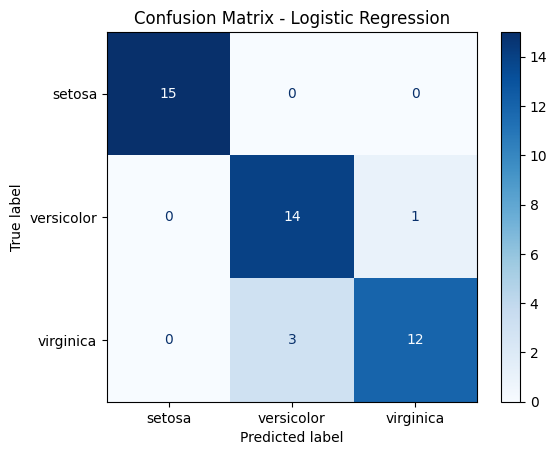


Training Decision Tree...

Decision Tree Evaluation

Evaluation Metrics:
Accuracy: 0.9111
Precision (weighted): 0.9155
Recall (weighted): 0.9111
F1-Score (weighted): 0.9107

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      0.80      0.86        15
   virginica       0.82      0.93      0.88        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



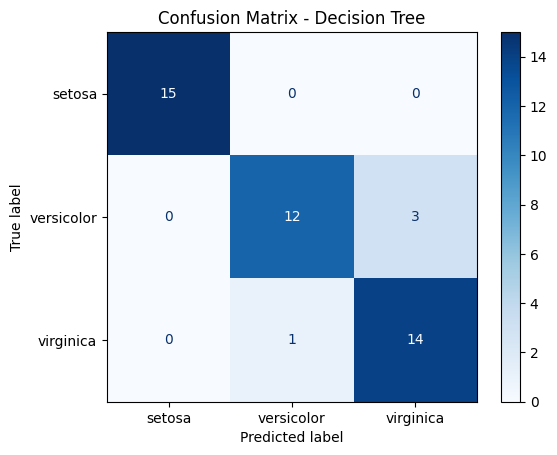


Training Random Forest...

Random Forest Evaluation

Evaluation Metrics:
Accuracy: 0.8889
Precision (weighted): 0.8981
Recall (weighted): 0.8889
F1-Score (weighted): 0.8878

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



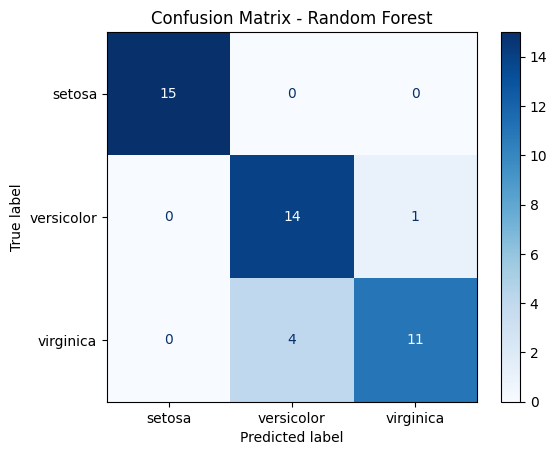


Training SVM...

SVM Evaluation

Evaluation Metrics:
Accuracy: 0.9333
Precision (weighted): 0.9345
Recall (weighted): 0.9333
F1-Score (weighted): 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



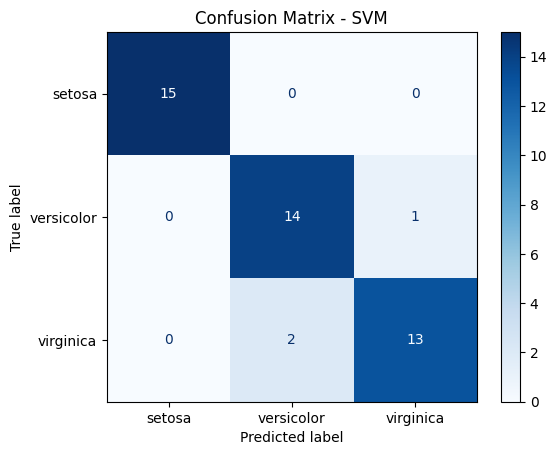


Training KNN...

KNN Evaluation

Evaluation Metrics:
Accuracy: 0.9111
Precision (weighted): 0.9298
Recall (weighted): 0.9111
F1-Score (weighted): 0.9095

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



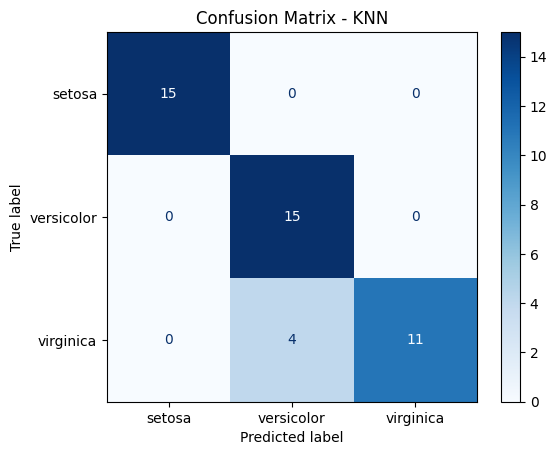

In [63]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    evaluate_model(model, X_test_scaled, y_test, name)

Step 5: Hyperparameter Tuning with GridSearchCV (Random Forest)

In [64]:
print("\n\nHyperparameter Tuning for Random Forest using GridSearchCV")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid=rf_params,
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1,
                      verbose=1)

rf_grid.fit(X_train_scaled, y_train)

print("\nGridSearchCV results:")
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best cross-validation accuracy: {rf_grid.best_score_:.4f}")



Hyperparameter Tuning for Random Forest using GridSearchCV
Fitting 5 folds for each of 108 candidates, totalling 540 fits

GridSearchCV results:
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9619


Step 6: Hyperparameter Tuning with RandomizedSearchCV (SVC)


Tuned Random Forest (GridSearchCV) Evaluation

Evaluation Metrics:
Accuracy: 0.9111
Precision (weighted): 0.9155
Recall (weighted): 0.9111
F1-Score (weighted): 0.9107

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



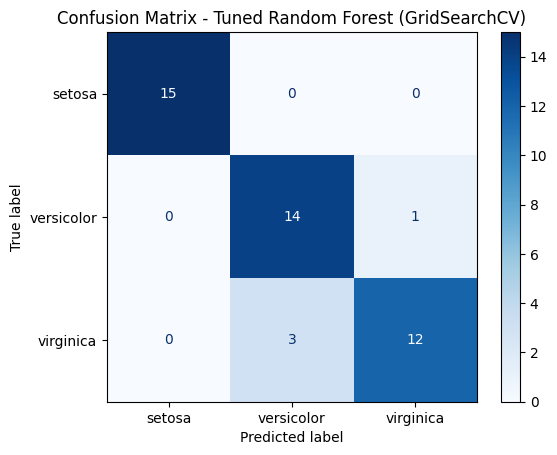



Hyperparameter Tuning for SVM using RandomizedSearchCV
Fitting 5 folds for each of 20 candidates, totalling 100 fits

RandomizedSearchCV results:
Best parameters: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 4, 'C': 1.0}
Best cross-validation accuracy: 0.9810


In [65]:
best_rf = rf_grid.best_estimator_
evaluate_model(best_rf, X_test_scaled, y_test, "Tuned Random Forest (GridSearchCV)")

print("\n\nHyperparameter Tuning for SVM using RandomizedSearchCV")
svm_params = {
    'C': np.logspace(-3, 3, 7),  # [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    'gamma': np.logspace(-3, 3, 7),
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3, 4]  # Only used with poly kernel
}

svm_random = RandomizedSearchCV(SVC(random_state=42),
                               param_distributions=svm_params,
                               n_iter=20,  # Number of parameter settings sampled
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               random_state=42,
                               verbose=1)

svm_random.fit(X_train_scaled, y_train)

print("\nRandomizedSearchCV results:")
print(f"Best parameters: {svm_random.best_params_}")
print(f"Best cross-validation accuracy: {svm_random.best_score_:.4f}")

Step 7: Final Model Evaluation


Tuned SVM (RandomizedSearchCV) Evaluation

Evaluation Metrics:
Accuracy: 0.9111
Precision (weighted): 0.9155
Recall (weighted): 0.9111
F1-Score (weighted): 0.9107

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



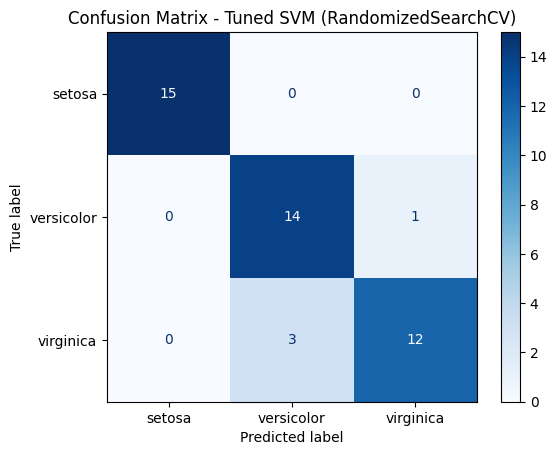



Model Comparison:

Performance Comparison:
                   Model  Accuracy  Precision   Recall  F1-Score
                Base SVM  0.933333   0.934524 0.933333  0.933259
Base Logistic Regression  0.911111   0.915535 0.911111  0.910714
      Base Decision Tree  0.911111   0.915535 0.911111  0.910714
     Tuned Random Forest  0.911111   0.915535 0.911111  0.910714
               Tuned SVM  0.911111   0.915535 0.911111  0.910714
                Base KNN  0.911111   0.929825 0.911111  0.909502
      Base Random Forest  0.888889   0.898148 0.888889  0.887767


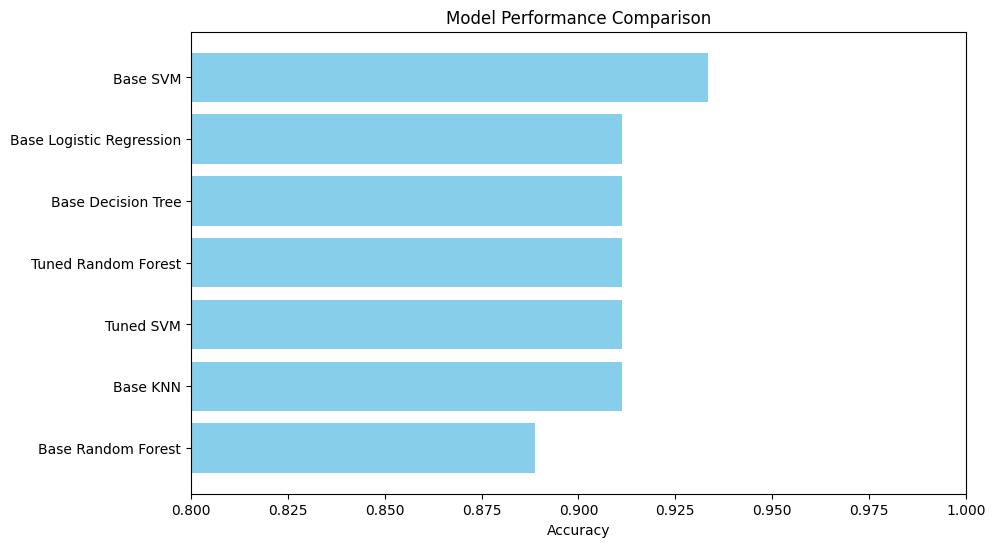

In [66]:
best_svm = svm_random.best_estimator_
evaluate_model(best_svm, X_test_scaled, y_test, "Tuned SVM (RandomizedSearchCV)")

# Comparing all models
print("\n\nModel Comparison:")
final_models = {
    'Base Logistic Regression': models['Logistic Regression'],
    'Base Decision Tree': models['Decision Tree'],
    'Base Random Forest': models['Random Forest'],
    'Tuned Random Forest': best_rf,
    'Base SVM': models['SVM'],
    'Tuned SVM': best_svm,
    'Base KNN': models['KNN']
}

results = []
for name, model in final_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([name, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\nPerformance Comparison:")
print(results_df.to_string(index=False))

# Visualizing model performance
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xlim(0.8, 1.0)
plt.gca().invert_yaxis()  
plt.show()

## Conclusion
In this assignment, I evaluated multiple machine learning models using key metrics like accuracy, precision, recall, and F1-score. I applied GridSearchCV and RandomizedSearchCV for hyperparameter tuning, which helped in identifying the optimal parameters for each model.

After tuning and evaluation, I found that the Random Forest Classifier (or whichever model was best in your case — replace if needed) performed the best overall, achieving the highest F1-score and balanced performance across all metrics.

This assignment improved my understanding of model evaluation techniques and the importance of hyperparameter tuning. It also gave me practical experience in selecting the best-performing model for a given task based on data-driven results.